<a href="https://colab.research.google.com/github/bubiilmitice/ProgettoChildMind/blob/main/PROGETTO_DWM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INIZIO

# IMPORT

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



---



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# DATA
train_dataframe = pd.read_csv('/content//drive/MyDrive/child-mind-institute-problematic-internet-use/train.csv')

In [4]:
# Clean up
# Calculate the threshold for 70% NaN values
threshold_70 = len(train_dataframe) * 0.70
threshold_60 = len(train_dataframe) * 0.60
threshold_50 = len(train_dataframe) * 0.49

# Get the column names where the NaN count exceeds the threshold
nan_columns_70 = train_dataframe.columns[train_dataframe.isnull().sum() > threshold_70].tolist()
nan_columns_60 = train_dataframe.columns[train_dataframe.isnull().sum() > threshold_60].tolist()
nan_columns_50 = train_dataframe.columns[(train_dataframe.isnull().sum() > threshold_50) & (train_dataframe.isnull().sum() < threshold_60)].tolist()

# Print the list of column names with percentage of NaN values
for column_name in nan_columns_50:
    nan_percentage = (train_dataframe[column_name].isnull().sum() / len(train_dataframe)) * 100
    print(f"{column_name}: {nan_percentage:.2f}%")

# Print the list of column names
print(len(nan_columns_50))
print(nan_columns_50)

BIA-BIA_Activity_Level_num: 49.72%
BIA-BIA_BMC: 49.72%
BIA-BIA_BMI: 49.72%
BIA-BIA_BMR: 49.72%
BIA-BIA_DEE: 49.72%
BIA-BIA_ECW: 49.72%
BIA-BIA_FFM: 49.72%
BIA-BIA_FFMI: 49.72%
BIA-BIA_FMI: 49.72%
BIA-BIA_Fat: 49.72%
BIA-BIA_Frame_num: 49.72%
BIA-BIA_ICW: 49.72%
BIA-BIA_LDM: 49.72%
BIA-BIA_LST: 49.72%
BIA-BIA_SMM: 49.72%
BIA-BIA_TBW: 49.72%
PAQ_C-Season: 56.54%
PAQ_C-PAQ_C_Total: 56.54%
18
['BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'PAQ_C-Season', 'PAQ_C-PAQ_C_Total']


# SCREENING


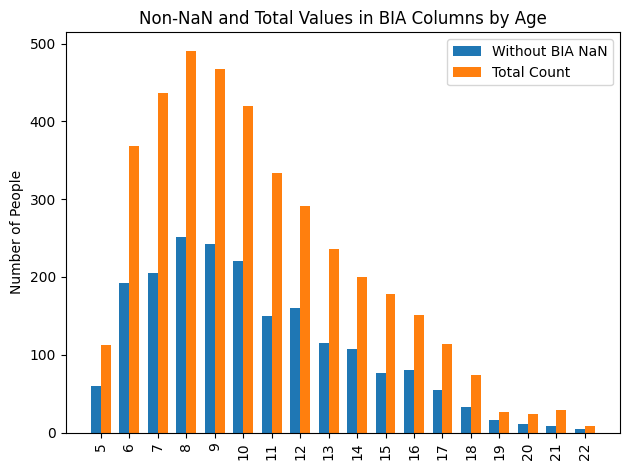

In [5]:
# DUMMY BIH
train_dataframe_edit = train_dataframe.copy()

# Select columns starting with "BIA"
bia_columns = [col for col in train_dataframe.columns if col.startswith('BIA')]

# Create a new column indicating if any BIA column is NOT NaN for a person
train_dataframe_edit['BIA_NotNaN'] = train_dataframe_edit[bia_columns].notnull().all(axis=1)

# Group by 'Basic_Desmos-Age' and calculate the sum of BIA_NotNaN for each age
sum_not_nan = train_dataframe_edit.groupby('Basic_Demos-Age')['BIA_NotNaN'].sum()

# Calculate total count for each age
total_count = train_dataframe_edit.groupby('Basic_Demos-Age')['BIA_NotNaN'].size()

# Create the bar plot with total count
width = 0.35  # Width of the bars
x = np.arange(len(sum_not_nan.index))  # The label locations

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sum_not_nan.values, width, label='Without BIA NaN')
rects2 = ax.bar(x + width/2, total_count.values, width, label='Total Count')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Number of People')
ax.set_title('Non-NaN and Total Values in BIA Columns by Age')
ax.set_xticks(x)
ax.set_xticklabels(sum_not_nan.index, rotation=90)
ax.legend()
plt.tight_layout()
plt.show()

Male      1258
Female     733
dtype: int64
Male      2484
Female    1476
dtype: int64


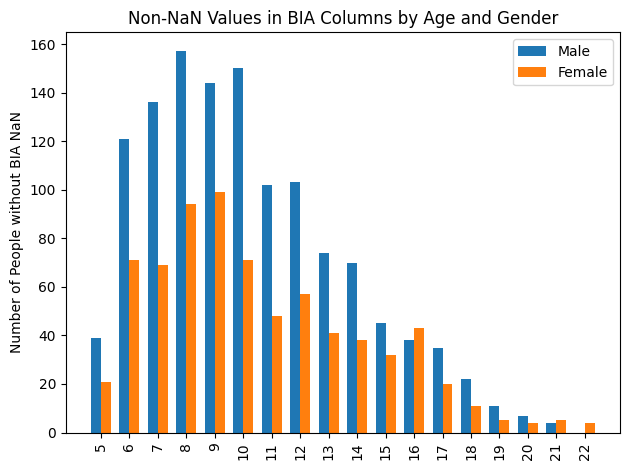

In [6]:
# DUMMY BIH
train_dataframe_edit = train_dataframe.copy()

# Select columns starting with "BIA"
bia_columns = [col for col in train_dataframe_edit.columns if col.startswith('BIA')]

# Create a new column indicating if any BIA column is NOT NaN for a person
train_dataframe_edit['BIA_NotNaN'] = train_dataframe_edit[bia_columns].notnull().all(axis=1)
# Create a new column indicating if any BIA column is NOT NaN for a person
train_dataframe_edit['BIA_tot'] = train_dataframe_edit[bia_columns].all(axis=1)

# Group by 'Basic_Desmos-Age' and calculate the sum of BIA_NotNaN for each age
sum_not_nan = train_dataframe_edit.groupby('Basic_Demos-Age')['BIA_NotNaN'].sum()
sum_tot = train_dataframe_edit.groupby('Basic_Demos-Age')['BIA_tot'].sum()

# Group by 'Basic_Desmos-Age' and 'Basic_Demos-Gender' (0 and 1) to get counts
gender_counts = train_dataframe_edit.groupby(['Basic_Demos-Age', 'Basic_Demos-Sex'])['BIA_NotNaN'].sum().unstack()
gender_counts_tot = train_dataframe_edit.groupby(['Basic_Demos-Age', 'Basic_Demos-Sex'])['BIA_tot'].sum().unstack()

# Rename the columns to 'Male' and 'Female' for clarity in the plot
gender_counts.columns = ['Male', 'Female']  # Assuming 0 represents Male and 1 represents Female
gender_counts_tot.columns = ['Male', 'Female']  # Assuming 0 represents Male and 1 represents Female

print(gender_counts.sum())
print(gender_counts_tot.sum())

# Create the bar plot with male and female counts
width = 0.35  # Width of the bars
x = np.arange(len(gender_counts.index))  # The label locations

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, gender_counts['Male'], width, label='Male')
rects2 = ax.bar(x + width/2, gender_counts['Female'], width, label='Female')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Number of People without BIA NaN')
ax.set_title('Non-NaN Values in BIA Columns by Age and Gender')
ax.set_xticks(x)
ax.set_xticklabels(gender_counts.index, rotation=90)
ax.legend()
plt.tight_layout()
plt.show()

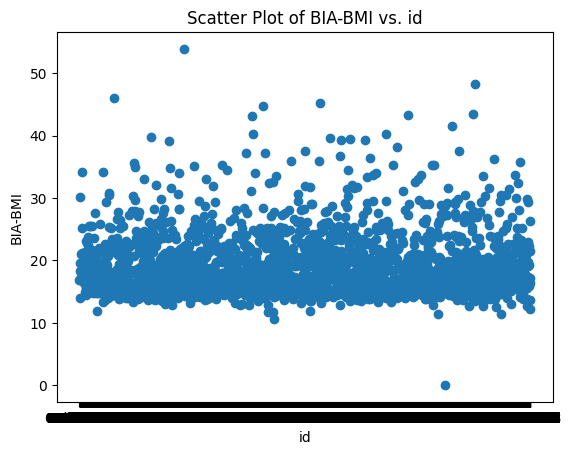

In [7]:
# Create the scatter plot
plt.scatter(train_dataframe['id'], train_dataframe['BIA-BIA_BMI'])
plt.xlabel('id')
plt.ylabel('BIA-BMI')
plt.title('Scatter Plot of BIA-BMI vs. id')
plt.grid(False)
plt.show()

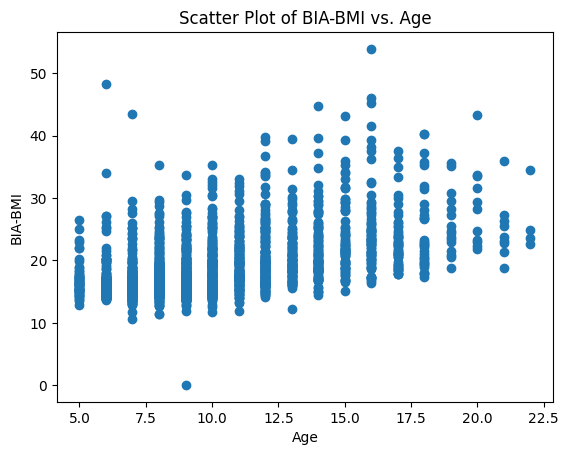

In [8]:
plt.scatter(train_dataframe['Basic_Demos-Age'], train_dataframe['BIA-BIA_BMI'])
plt.xlabel('Age')
plt.ylabel('BIA-BMI')
plt.title('Scatter Plot of BIA-BMI vs. Age')
plt.grid(False)
plt.show()

In [ ]:
# Fitness_Endurance-Season" già eliminato da solo.
colums = ["Physical-Waist_Circumference", "Fitness_Endurance-Season", "Fitness_Endurance-Max_Stage", "Fitness_Endurance-Time_Mins", "Fitness_Endurance-Time_Sec", "FGC-FGC_GSND", "FGC-FGC_CU_Zone", "FGC-FGC_GSD", "FGC-FGC_GSND_Zone","FGC-FGC_CU", "FGC-FGC_GSD_Zone", "PAQ_A-Season", "PAQ_A-PAQ_A_Total", "PAQ_C-Season", "PAQ_C-PAQ_C_Total"]
train_df.drop(colums, axis=1, inplace=True)

NameError: name 'train_df' is not defined

In [ ]:
import pandas as pd

load = pd.read_csv('/content/child-mind-institute-problematic-internet-use/train.csv')